Day4 Reference (Without Regularization techniques and Learning Rate):

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

#Load MNIST Dataset
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

#Normalize the Dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

#Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Loss: {test_loss:.6f}")
print(f"Accuracy: {test_acc:.6f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8725 - loss: 0.4465 - val_accuracy: 0.9657 - val_loss: 0.1122
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9654 - loss: 0.1144 - val_accuracy: 0.9755 - val_loss: 0.0907
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9768 - loss: 0.0752 - val_accuracy: 0.9757 - val_loss: 0.0875
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9836 - loss: 0.0526 - val_accuracy: 0.9793 - val_loss: 0.0702
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9863 - loss: 0.0423 - val_accuracy: 0.9780 - val_loss: 0.0808
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9887 - loss: 0.0333 - val_accuracy: 0.9777 - val_loss: 0.0865
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9910 - loss: 0.0266 - val_accuracy: 0.9728 - val_loss: 0.0978
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9918 - loss: 0.0244 

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
# Define the learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)

In [16]:
# 1 Regularization tehnique (Dropout)
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# 2 Regularization techniques (Dropout + L2 Regularization)
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [19]:
train1 = model1.fit(x_train, y_train, epochs=10, validation_split=0.1)
print("\n")
train2 = model2.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9507 - loss: 0.1645 - val_accuracy: 0.9718 - val_loss: 0.0926
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9598 - loss: 0.1346 - val_accuracy: 0.9738 - val_loss: 0.0881
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9636 - loss: 0.1227 - val_accuracy: 0.9800 - val_loss: 0.0744
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9661 - loss: 0.1133 - val_accuracy: 0.9780 - val_loss: 0.0776
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9681 - loss: 0.1071 - val_accuracy: 0.9785 - val_loss: 0.0751
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9698 - loss: 0.0980 - val_accuracy: 0.9803 - val_loss: 0.0710
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9702 - loss: 0.0959 - val_accuracy: 0.9795 - val_loss: 0.0776
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9724 - loss: 0.0871 

In [20]:
print("Model 1 Evaluation (Dropout Only):")
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss1:.6f}")
print(f"Test Accuracy: {test_acc1:.6f}")

print("\nModel 2 Evaluation (Dropout + L2):")
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss2:.6f}")
print(f"Test Accuracy: {test_acc2:.6f}")

Model 1 Evaluation (Dropout Only):
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9721 - loss: 0.1009
Test Loss: 0.086806
Test Accuracy: 0.976300

Model 2 Evaluation (Dropout + L2):
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.2308
Test Loss: 0.211850
Test Accuracy: 0.969900


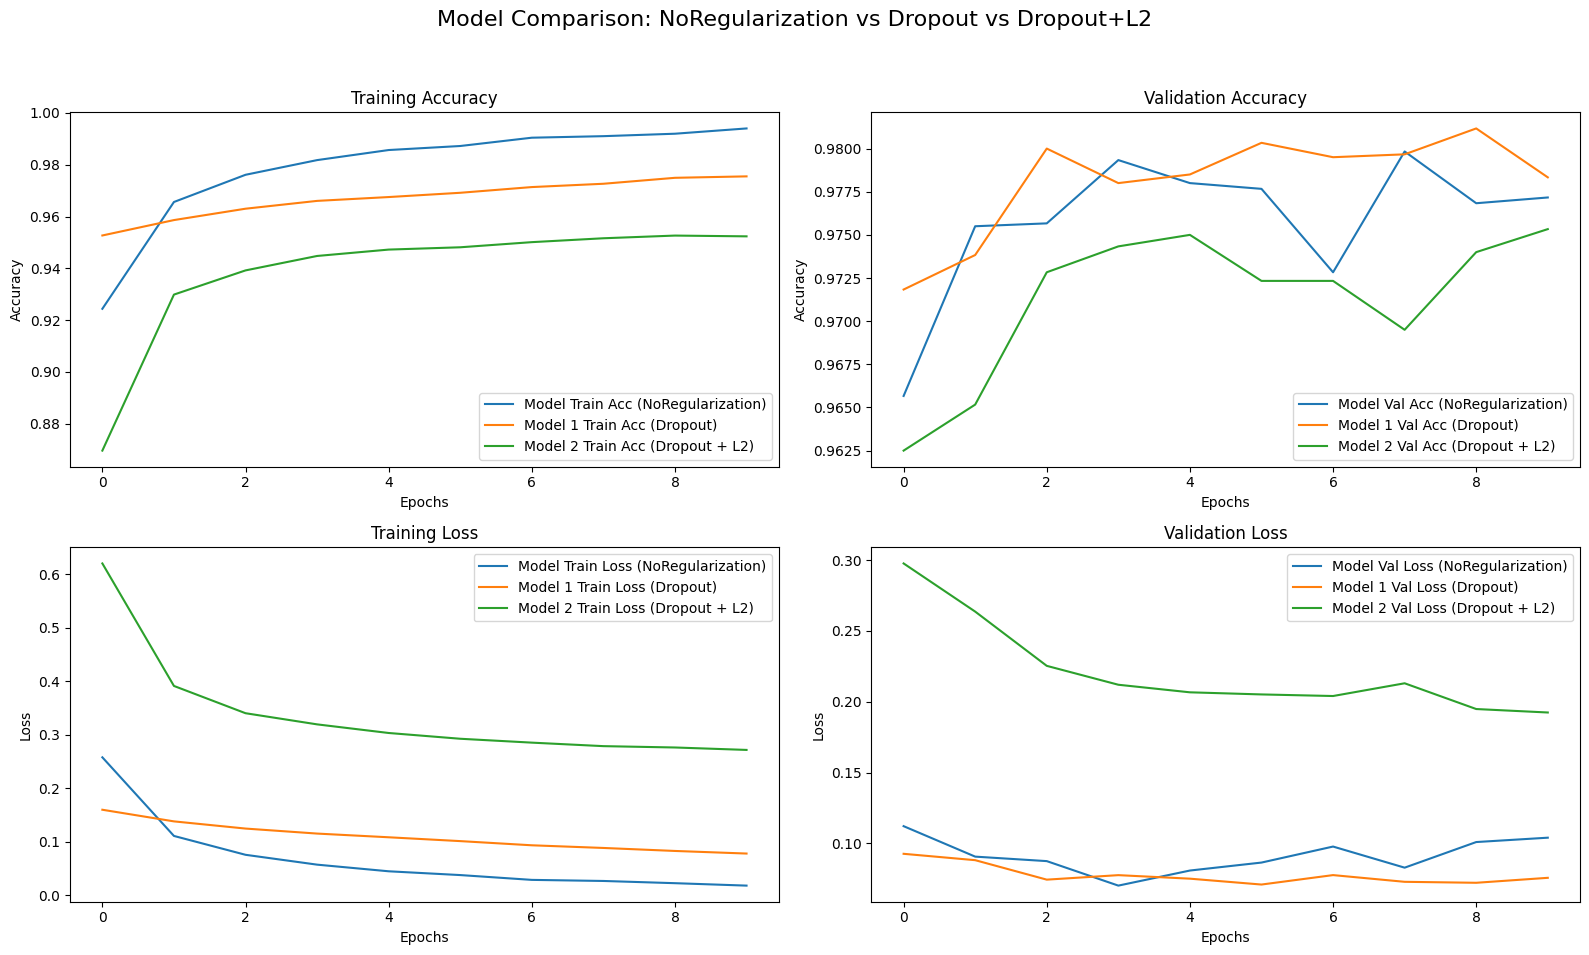

In [24]:
plt.figure(figsize=(16, 10))

# Training Accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model Train Acc (NoRegularization)')
plt.plot(train1.history['accuracy'], label='Model 1 Train Acc (Dropout)')
plt.plot(train2.history['accuracy'], label='Model 2 Train Acc (Dropout + L2)')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(history.history['val_accuracy'], label='Model Val Acc (NoRegularization)')
plt.plot(train1.history['val_accuracy'], label='Model 1 Val Acc (Dropout)')
plt.plot(train2.history['val_accuracy'], label='Model 2 Val Acc (Dropout + L2)')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Model Train Loss (NoRegularization)')
plt.plot(train1.history['loss'], label='Model 1 Train Loss (Dropout)')
plt.plot(train2.history['loss'], label='Model 2 Train Loss (Dropout + L2)')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Validation Loss
plt.subplot(2, 2, 4)
plt.plot(history.history['val_loss'], label='Model Val Loss (NoRegularization)')
plt.plot(train1.history['val_loss'], label='Model 1 Val Loss (Dropout)')
plt.plot(train2.history['val_loss'], label='Model 2 Val Loss (Dropout + L2)')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Model Comparison: NoRegularization vs Dropout vs Dropout+L2", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


ANALYSIS:-

Model:
*   No Regularization.
*   No Learning Rate Scheduler.
*   This model performs well initially, but without regularization or learning rate decay, it's more vulnerable to overfitting and less stable learning over time. It's a good baseline, but not ideal for generalization.

Model1:
*   Used Dropout Regularization technique.
*   Included Learning Rate Scheduler.
*   This model doesn't overfit and learns well.
*   Dropout helps by randomly turning off neurons during training, forcing the network to learn robust patterns.
*   Learning rate scheduler allows stable convergence and fine-tuning as training progresses.
*   It's the strongest performer among all three (highest Accuracy and lowest Loss).

Model2:
*   Used Dropout and L2 Regularization technique.
*   Included Learning Rate Scheduler.
*   Adding both Dropout and L2 resulted in underfitting.
*   Has lowest Accuracy and highest Loss.













